In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
zoo = pd.read_csv("D:\\Assignment\\Assignment_13_KNN\\zoo.csv")

In [3]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
# unique value and counts

In [8]:
zoo.hair.unique()

array([1, 0], dtype=int64)

In [9]:
zoo.hair.value_counts()

0    58
1    43
Name: hair, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hair', ylabel='count'>

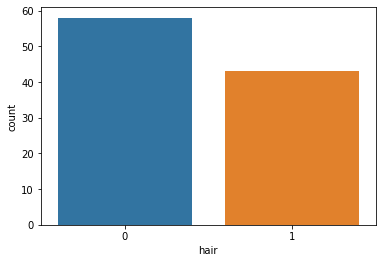

In [10]:
# Visualization
sns.countplot(zoo.hair)

In [11]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

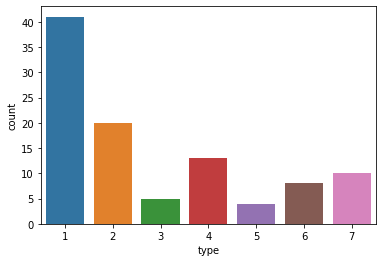

In [12]:
sns.countplot(zoo.type)

In [13]:
zoo1 = zoo.drop("animal name" ,axis =1)
zoo1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Features Engineering
# Univariate

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [15]:
array = zoo1.values

In [16]:
x = array[:,0:16]
y = array[:,-1]

In [17]:
x


array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [18]:
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [19]:
# Features extraction
test = SelectKBest(score_func=chi2) 
fit = test.fit(x,y)

In [20]:
from numpy import set_printoptions

In [21]:
set_printoptions(precision=3)
score = fit.scores_

In [22]:
score

array([48.834, 81.   , 37.42 , 60.   , 49.215, 29.869,  5.431, 37.06 ,
       18.   , 17.339, 17.59 , 62.554, 81.171, 16.88 ,  4.193, 20.976])

In [23]:
score1 = pd.DataFrame(score ,columns = ["score"])

In [24]:
score1

,score
0,48.833806
1,81.000000
2,37.419719
3,60.000000
4,49.214736
5,29.868970
6,5.430810
7,37.060056
8,18.000000
9,17.338750


In [25]:
# predator and domestic features have low chi2 value
# i.e. our target variable is less dependent on above two features ,so we are going to drop them to increase model accuracy

In [26]:
# Drop predator and domestic features

zoo_new = zoo1.drop(["predator","domestic"] , axis = 1)
zoo_new

,hair,feathers,eggs,milk,airborne,aquatic,toothed,backbone,breathes,venomous,fins,legs,tail,catsize,type
0,1,0,0,1,0,0,1,1,1,0,0,4,0,1,1
1,1,0,0,1,0,0,1,1,1,0,0,4,1,1,1
2,0,0,1,0,0,1,1,1,0,0,1,0,1,0,4
3,1,0,0,1,0,0,1,1,1,0,0,4,0,1,1
4,1,0,0,1,0,0,1,1,1,0,0,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,1,1,1,0,0,2,1,1,1
97,1,0,1,0,1,0,0,0,1,1,0,6,0,0,6
98,1,0,0,1,0,0,1,1,1,0,0,4,1,1,1
99,0,0,1,0,0,0,0,0,1,0,0,0,0,0,7


# train test split


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x1 = zoo_new.iloc[:,0:14]
y1 = zoo_new.iloc[:,-1]

In [29]:
x1

,hair,feathers,eggs,milk,airborne,aquatic,toothed,backbone,breathes,venomous,fins,legs,tail,catsize
0,1,0,0,1,0,0,1,1,1,0,0,4,0,1
1,1,0,0,1,0,0,1,1,1,0,0,4,1,1
2,0,0,1,0,0,1,1,1,0,0,1,0,1,0
3,1,0,0,1,0,0,1,1,1,0,0,4,0,1
4,1,0,0,1,0,0,1,1,1,0,0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,1,1,1,0,0,2,1,1
97,1,0,1,0,1,0,0,0,1,1,0,6,0,0
98,1,0,0,1,0,0,1,1,1,0,0,4,1,1
99,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [30]:
y1

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1 ,test_size =0.20, random_state =2)

In [32]:
x_train

,hair,feathers,eggs,milk,airborne,aquatic,toothed,backbone,breathes,venomous,fins,legs,tail,catsize
11,0,1,1,0,1,0,0,1,1,0,0,2,1,0
89,0,0,1,0,0,1,1,1,1,0,0,4,0,0
44,1,0,0,1,0,0,1,1,1,0,0,4,1,1
71,0,1,1,0,0,0,0,1,1,0,0,2,1,1
5,1,0,0,1,0,0,1,1,1,0,0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0,1,1,0,1,0,0,1,1,0,0,2,1,0
22,1,0,0,1,0,0,1,1,1,0,0,4,1,1
72,0,0,0,0,0,0,0,0,1,1,0,8,1,0
15,0,0,1,0,0,1,0,0,0,0,0,6,0,0


# Grid search  for finding optimal number of Neighbors

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model ,param_grid=param_grid)
grid.fit(x_train ,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [37]:
print(grid.best_score_)
print(grid.best_params_)

0.95
{'n_neighbors': 1}


In [38]:
# we got best score with k nearest neighbor


# KNN algorithm

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train ,y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
y_pred = knn.predict(x_test)
y_pred

array([2, 6, 2, 6, 2, 2, 4, 1, 1, 7, 4, 1, 7, 7, 1, 2, 1, 1, 2, 1, 1],
      dtype=int64)

In [42]:
# Accuracy
knn.score(x_test ,y_test)

1.0

In [43]:
np.mean(y_pred==y_test)

1.0

In [44]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

In [45]:
cm = confusion_matrix(y_test ,y_pred)

In [46]:
cm

array([[8, 0, 0, 0, 0],
       [0, 6, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 3]], dtype=int64)

Text(69.0, 0.5, 'Original')

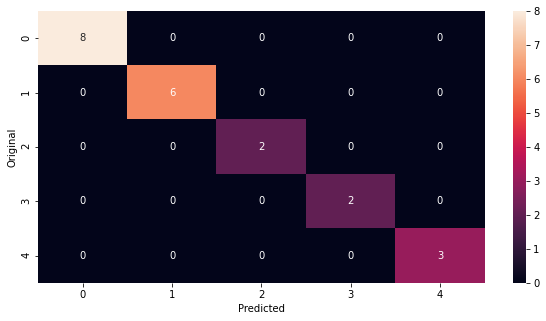

In [47]:
# Heatmap
plt.figure(figsize =(10,5))
sns.heatmap(cm , annot= True)
plt.xlabel("Predicted")
plt.ylabel("Original")